## Observations and Insights

* Capomulin and Ramicane were the most used treatment regimens with well over 200 treatments each, while Propriva was the least used with only about 150 treatments
* The study is almost equally distributed across genders, with males being only slightly more (50.6%) than females (49.4%)
* The correlation between mouse weight and average tumor volume for the Capomulin regimen is high and positive (0.84), which shows that larger or heavier mice are more likely to have larger tumours
* Capomulin shows strong performance that proves its ability to effectively reduce cancerous growth

## Dependencies

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how= "outer", on = "Mouse ID")
mouse_data = mouse_data.rename(columns={"Age_months": "Age (months)"})
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_stdev = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_summary_table = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_var,
                                 "Std. Deviation": regimen_stdev, "Std. Error": regimen_sem})
regimen_summary_table

,Mean,Median,Variance,Std. Deviation,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

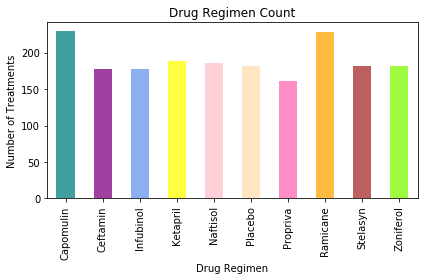

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count = mouse_data.groupby("Drug Regimen")["Mouse ID"].count()
color = ['teal', 'purple', 'cornflowerblue', 'yellow', 'pink', 'navajowhite', 'hotpink', 'orange', 'brown', 'lawngreen']

# Plotting the bar chart with labels
count_chart = regimen_count.plot(kind = "bar", title = "Drug Regimen Count", color = color, alpha=0.75)
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Treatments")

plt.tight_layout()
plt.show()

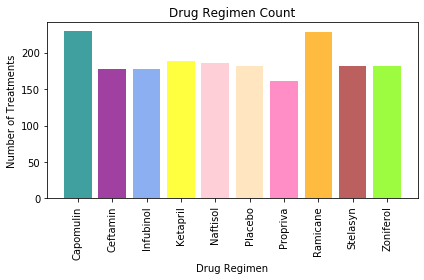

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_list = pd.Series(mouse_data["Drug Regimen"].unique()).sort_values()
x_axis = np.arange(len(regimen_list))

# Plotting the bar chart with labels
plt.bar(x_axis, regimen_count, color=color, tick_label = regimen_list, alpha=0.75, align="center")
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Treatments")

plt.tight_layout()
plt.show()

## Pie plots

<function matplotlib.pyplot.show(*args, **kw)>

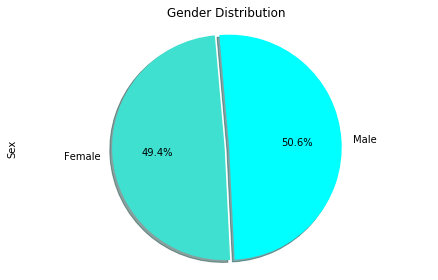

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_table = mouse_data.groupby("Sex")["Sex"].count()
gender_types = gender_table.keys()
colors = ["turquoise", "aqua"]
explode = (0, 0.04)

# Plotting the pie chart with labels
gender_pie = gender_table.plot(kind="pie", y=gender_types, title=("Gender Distribution"), explode=explode, colors=colors,
                                autopct="%1.1f%%", shadow=True, startangle=95)
plt.tight_layout()
plt.axis("equal")
plt.show

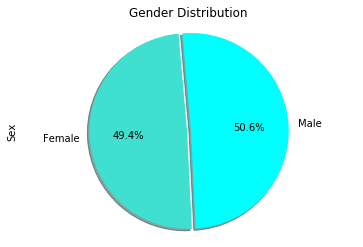

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_table, explode=explode, labels=gender_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=95)
plt.axis("equal")
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
promising_regimens = mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].min().sort_values()

# Get top 4 regimens and final timepoint
top_4_regimens = promising_regimens.head(4).to_frame().reset_index()["Drug Regimen"]
final_time = mouse_data.Timepoint.max()

# Final tumor volume
final_tumor_vol = mouse_data[mouse_data["Drug Regimen"].isin(top_4_regimens)]
final_tumor_vol = final_tumor_vol[final_tumor_vol.Timepoint==final_time]
final_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [10]:
# Getting quantile and IQR values for Ramicane to determine possible outliers
ramicane_endpoint = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_endpoint.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

# Possible outliers
print(f"Values below {ramicane_lower_bound} and above {ramicane_upper_bound} could be outliers.")

Values below 19.690480101250003 and above 49.79900043124999 could be outliers.


In [11]:
# Getting quantile and IQR values for Capomulin to determine possible outliers
capomulin_endpoint = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_endpoint.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5 * capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5 * capomulin_iqr)

# Possible outliers
print(f"Values below {capomulin_lower_bound} and above {capomulin_upper_bound} could be outliers.")

Values below 20.70456164999999 and above 51.83201549 could be outliers.


In [12]:
# Getting quantile and IQR values for Infubinol to determine possible outliers
infubinol_endpoint = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_endpoint.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5 * infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5 * infubinol_iqr)

# Possible outliers
print(f"Values below {infubinol_lower_bound} and above {infubinol_upper_bound} could be outliers.")

Values below 55.35777559500001 and above 75.08224443499999 could be outliers.


In [13]:
# Getting quantile and IQR values for Ceftamin to determine possible outliers
ceftamin_endpoint = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_endpoint.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5 * ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5 * ceftamin_iqr)

# Possible outliers
print(f"Values below {ceftamin_lower_bound} and above {ceftamin_upper_bound} could be outliers.")

Values below 52.29350701999999 and above 76.66786758 could be outliers.


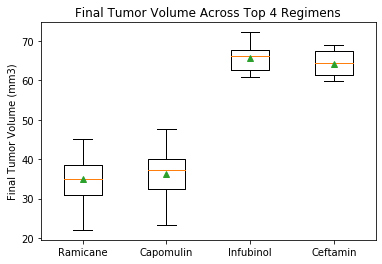

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
gold_diamond = dict(markerfacecolor='gold', marker='D')
ax1.set_title('Final Tumor Volume Across Top 4 Regimens')
ax1.boxplot([ramicane_endpoint, capomulin_endpoint, infubinol_endpoint, ceftamin_endpoint], labels=['Ramicane', 'Capomulin','Infubinol','Ceftamin'],
            showmeans = True, flierprops=gold_diamond)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

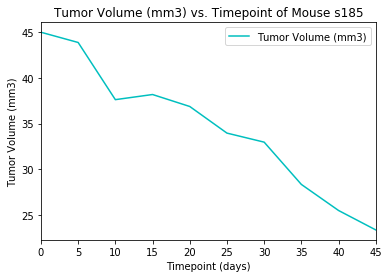

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mouse_data.loc[mouse_data["Drug Regimen"]=="Capomulin"]
capomulin_mouse_id = capomulin_df.iloc[0,0]
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == capomulin_mouse_id, ["Timepoint", "Tumor Volume (mm3)"]]

# Plotting the line chart with labels
capomulin_mouse_df.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line', color = "c", title="Tumor Volume (mm3) vs. Timepoint of Mouse " + capomulin_mouse_id)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

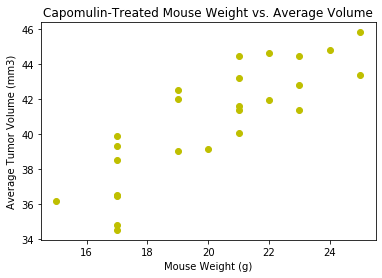

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Plotting the scatter plot with labels
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_vol, color = "y")
plt.title("Capomulin-Treated Mouse Weight vs. Average Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


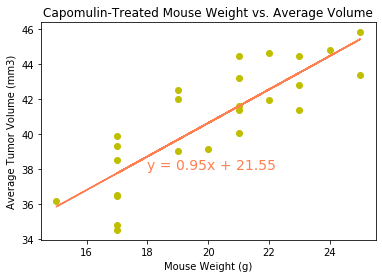

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_mouse_weight, capomulin_avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

# Getting the linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_weight, capomulin_avg_tumor_vol)
regress_values = (slope * capomulin_mouse_weight) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting the scatter plot with labels and the linear regression model
plt.scatter(capomulin_mouse_weight, capomulin_avg_tumor_vol, color = "y")
plt.plot(capomulin_mouse_weight,regress_values,"coral")
plt.annotate(line_eq,(18,38),fontsize=14,color="coral")
plt.title("Capomulin-Treated Mouse Weight vs. Average Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()